<a href="https://colab.research.google.com/github/Deepakm100/Minor_Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Runga Kutta Method

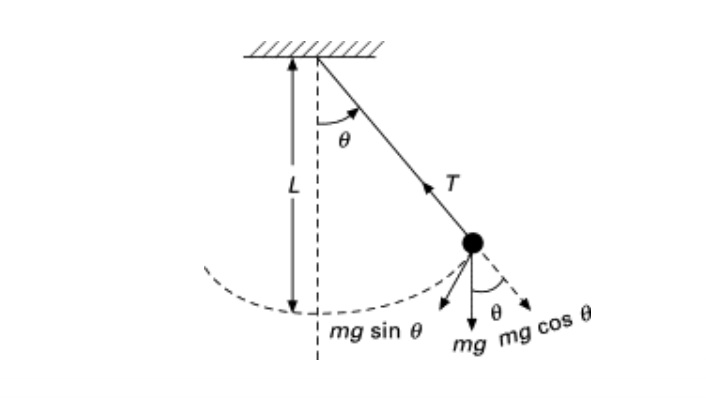

In [ ]:
#  For the simple pendulum

import numpy as np

def f(theta, omega, g=9.81, L=1.0):
    """Define the function for the pendulum's differential equation."""
    return - (g / L) * np.sin(theta)

def runge_kutta_4(theta0, omega0, t0, h, num_steps):
    theta = theta0
    omega = omega0
    t = t0

    for _ in range(num_steps):
        k1_theta = h * omega
        k1_omega = h * f(theta, omega)

        k2_theta = h * (omega + 0.5 * k1_omega)
        k2_omega = h * f(theta + 0.5 * k1_theta, omega + 0.5 * k1_omega)

        k3_theta = h * (omega + 0.5 * k2_omega)
        k3_omega = h * f(theta + 0.5 * k2_theta, omega + 0.5 * k2_omega)

        k4_theta = h * (omega + k3_omega)
        k4_omega = h * f(theta + k3_theta, omega + k3_omega)

        theta += (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta) / 6.0
        omega += (k1_omega + 2 * k2_omega + 2 * k3_omega + k4_omega) / 6.0

        t += h

        print(f"t={t:.2f}, theta={theta:.5f}, omega={omega:.5f}")

# Initial conditions
theta0 = 0.1  # Initial angle (in radians)
omega0 = 0.0  # Initial angular velocity (in radians/s)
t0 = 0.0      # Initial time
h = 0.1       # Time step
num_steps = 10  # Number of iterations

runge_kutta_4(theta0, omega0, t0, h, num_steps)


t=0.10, theta=0.09514, omega=-0.09634
t=0.20, theta=0.08104, omega=-0.18335
t=0.30, theta=0.05907, omega=-0.25258
t=0.40, theta=0.03135, omega=-0.29727
t=0.50, theta=0.00059, omega=-0.31306
t=0.60, theta=-0.03024, omega=-0.29840
t=0.70, theta=-0.05812, omega=-0.25472
t=0.80, theta=-0.08035, omega=-0.18630
t=0.90, theta=-0.09477, omega=-0.09981
t=1.00, theta=-0.09999, omega=-0.00366


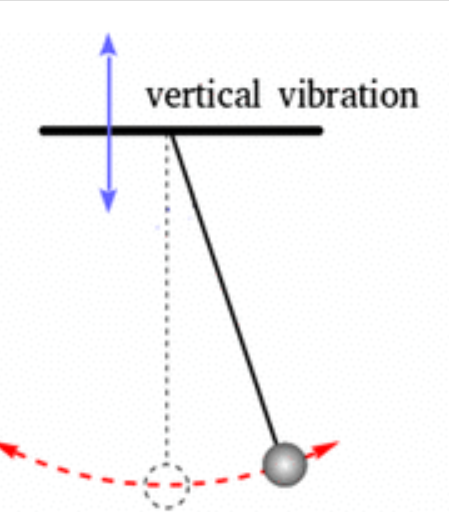

sizes--> 1001,1001,1001


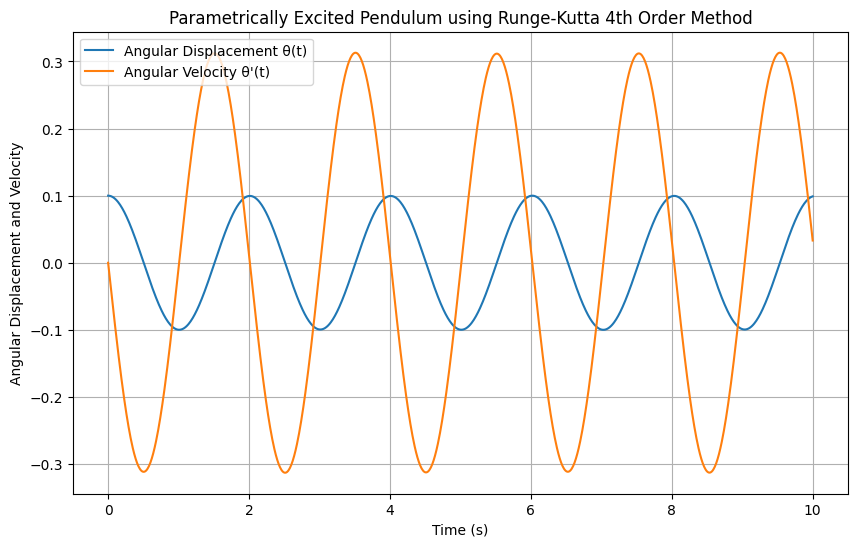

In [6]:
# For parametrically excited pendulum

import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
g = 9.81  # acceleration due to gravity (m/s^2)
L = 1.0   # length of the pendulum (m)
A = 0.1   # amplitude of the parametric excitation (m)
omega = 1.0  # frequency of the parametric excitation (rad/s)

# Define the equations of motion
def f1(theta2):
    return theta2

def f2(t, theta1):
    return -((g/L) - (A * omega**2 / L) * np.cos(omega * t)) * np.sin(theta1)

# Runge-Kutta 4th order method
def runge_kutta(t0, theta1_0, theta2_0, h, n):
    t = np.zeros(n+1)
    theta1 = np.zeros(n+1)
    theta2 = np.zeros(n+1)

    # Initial conditions
    t[0] = t0
    theta1[0] = theta1_0
    theta2[0] = theta2_0

    for i in range(n):
        k1_theta1 = h * theta2[i]
        k1_theta2 = h * f2(t[i], theta1[i])

        k2_theta1 = h * (theta2[i] + 0.5*k1_theta2)
        k2_theta2 = h * f2(t[i] + 0.5*h, theta1[i] + 0.5*k1_theta1)

        k3_theta1 = h * (theta2[i] + 0.5*k2_theta2)
        k3_theta2 = h * f2(t[i] + 0.5*h, theta1[i] + 0.5*k2_theta1)

        k4_theta1 = h * (theta2[i] + k3_theta2)
        k4_theta2 = h * f2(t[i] + h, theta1[i] + k3_theta1)


        theta1[i+1] = theta1[i] + (1.0/6.0)*(k1_theta1 + 2*k2_theta1 + 2*k3_theta1 + k4_theta1) # -- angular displacement
        theta2[i+1] = theta2[i] + (1.0/6.0)*(k1_theta2 + 2*k2_theta2 + 2*k3_theta2 + k4_theta2) # -- angular velocity
        t[i+1] = t[i] + h

    return t, theta1, theta2

# Initial conditions
t0 = 0.0
theta1_0 = 0.1  # small initial angle (radians)
theta2_0 = 0.0  # starting from rest
h = 0.01        # time step
n = 1000        # number of steps

# Solve the system using Runge-Kutta 4th order method
t, theta1, theta2 = runge_kutta(t0, theta1_0, theta2_0, h, n)
print(f"sizes--> {np.size(t)},{np.size(theta1)},{np.size(theta2)}")

#  here theta1 --> angluar displacement
# here theta2 --> angluar velocity --> that is w
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, theta1, label='Angular Displacement θ(t)')
plt.plot(t, theta2, label='Angular Velocity θ\'(t)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement and Velocity')
plt.legend()
plt.grid(True)
plt.title('Parametrically Excited Pendulum using Runge-Kutta 4th Order Method')
plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters
# g = 9.81  # gravity (m/s^2)
# L = 1.0   # length of pendulum (m)
# A = 0.1   # amplitude of parametric excitation (m)
# omega = 1.0  # frequency of parametric excitation (rad/s)
# theta_desired = 0.0  # desired position (radians)

# # PID gains
# Kp = 10.0  # Proportional gain
# Ki = 0.5   # Integral gain
# Kd = 5.0   # Derivative gain

# # Define the equations of motion with PID control
# def f1(t, theta1, theta2):
#     return theta2

# def f2(t, theta1, theta2, integral_error, previous_error, dt):
#     error = theta1 - theta_desired
#     derivative_error = (error - previous_error) / dt
#     integral_error += error * dt

#     # PID control torque
#     T = - (Kp * error + Ki * integral_error + Kd * derivative_error)

#     # Equation of motion with PID torque
#     return -((g/L) - (A * omega**2 / L) * np.cos(omega * t)) * np.sin(theta1) + T / (L**2)

# # Runge-Kutta 4th order method with PID
# def runge_kutta_pid(t0, theta1_0, theta2_0, h, n):
#     t = np.zeros(n+1)
#     theta1 = np.zeros(n+1)
#     theta2 = np.zeros(n+1)

#     # Initial conditions
#     t[0] = t0
#     theta1[0] = theta1_0
#     theta2[0] = theta2_0

#     integral_error = 0.0
#     previous_error = theta1_0 - theta_desired

#     for i in range(n):
#         k1_theta1 = h * f1(t[i], theta1[i], theta2[i])
#         k1_theta2 = h * f2(t[i], theta1[i], theta2[i], integral_error, previous_error, h)

#         k2_theta1 = h * f1(t[i] + 0.5*h, theta1[i] + 0.5*k1_theta1, theta2[i] + 0.5*k1_theta2)
#         k2_theta2 = h * f2(t[i] + 0.5*h, theta1[i] + 0.5*k1_theta1, theta2[i] + 0.5*k1_theta2, integral_error, previous_error, h)

#         k3_theta1 = h * f1(t[i] + 0.5*h, theta1[i] + 0.5*k2_theta1, theta2[i] + 0.5*k2_theta2)
#         k3_theta2 = h * f2(t[i] + 0.5*h, theta1[i] + 0.5*k2_theta1, theta2[i] + 0.5*k2_theta2, integral_error, previous_error, h)

#         k4_theta1 = h * f1(t[i] + h, theta1[i] + k3_theta1, theta2[i] + k3_theta2)
#         k4_theta2 = h * f2(t[i] + h, theta1[i] + k3_theta1, theta2[i] + k3_theta2, integral_error, previous_error, h)

#         theta1[i+1] = theta1[i] + (1.0/6.0)*(k1_theta1 + 2*k2_theta1 + 2*k3_theta1 + k4_theta1)
#         theta2[i+1] = theta2[i] + (1.0/6.0)*(k1_theta2 + 2*k2_theta2 + 2*k3_theta2 + k4_theta2)
#         t[i+1] = t[i] + h

#         # Update errors
#         error = theta1[i+1] - theta_desired
#         integral_error += error * h
#         previous_error = error

#     return t, theta1, theta2

# # Initial conditions
# t0 = 0.0
# theta1_0 = 0.2  # small initial angle (radians)
# theta2_0 = 0.0  # starting from rest
# h = 0.01        # time step
# n = 1000        # number of steps

# # Solve the system using Runge-Kutta 4th order method with PID control
# t, theta1, theta2 = runge_kutta_pid(t0, theta1_0, theta2_0, h, n)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(t, theta1, label='Angular Displacement θ(t)')
# plt.plot(t, theta2, label='Angular Velocity θ\'(t)')
# plt.xlabel('Time (s)')
# plt.ylabel('Angular Displacement and Velocity')
# plt.legend()
# plt.grid(True)
# plt.title('Parametrically Excited Pendulum with PID Control using Runge-Kutta 4th Order Method')
# plt.show()
